# Week-1

# Linear Regression Example using tensorflow
Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.


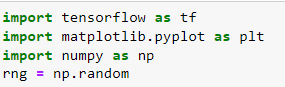

In [3]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
rng=np.random

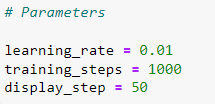

In [6]:
learning_rate=0.01
training_steps=1000
display_step=50

#### Just run the next cell using 'Ctrl' + 'Enter'

In [7]:
# Training Data.

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])

Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

n_samples = X.shape[0]

In [8]:
print(X,"\n",X.shape)

[ 3.3    4.4    5.5    6.71   6.93   4.168  9.779  6.182  7.59   2.167
  7.042 10.791  5.313  7.997  5.654  9.27   3.1  ] 
 (17,)


In [9]:
print(Y,"\n",Y.shape)

[1.7   2.76  2.09  3.19  1.694 1.573 3.366 2.596 2.53  1.221 2.827 3.465
 1.65  2.904 2.42  2.94  1.3  ] 
 (17,)


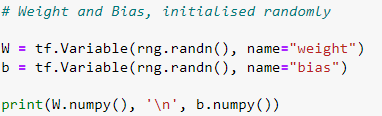

In [10]:
W=tf.Variable(rng.randn(),name="weight")
B=tf.Variable(rng.randn(),name="bias")
print(W.numpy(),"\n",B.numpy())

0.34783313 
 -0.034576204


In [22]:
#LINEAR REGRESSION(WX+B)
def linear_regression (x):
    return W*X+B

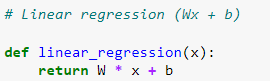

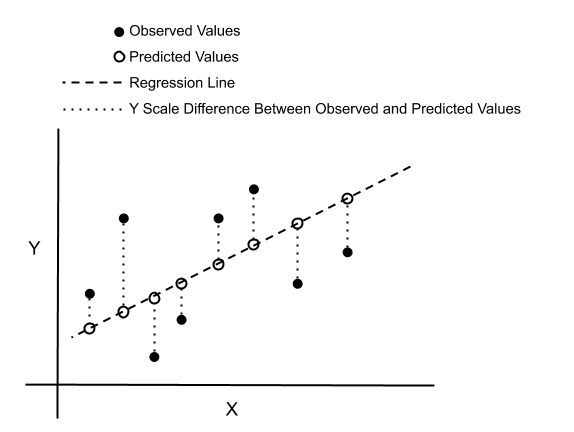

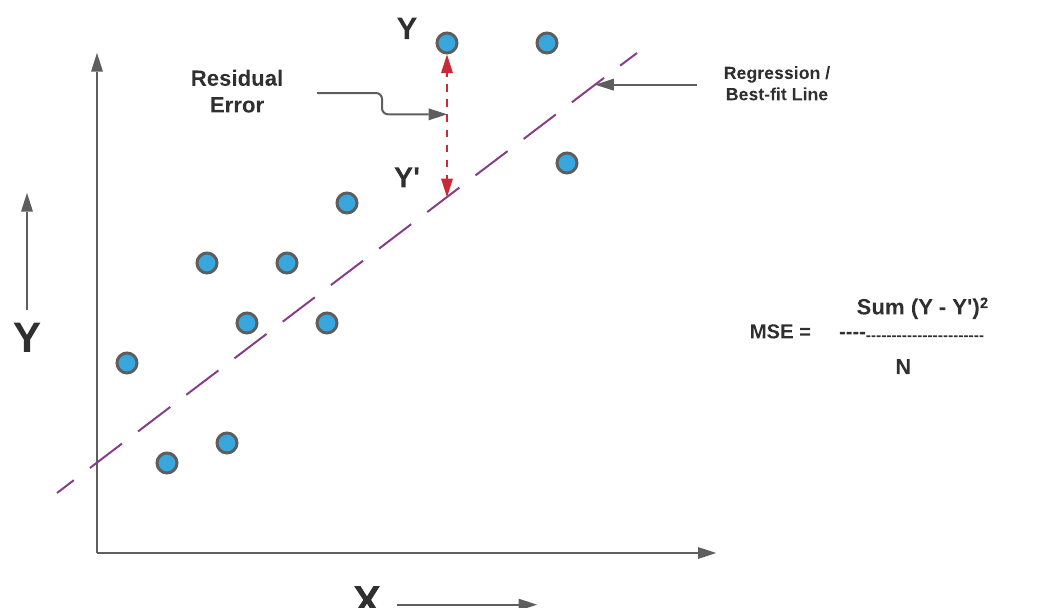

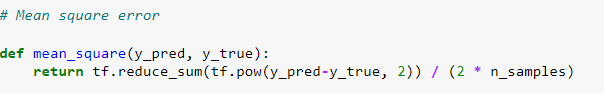

In [28]:
# MEAN SQUARE ERROR
def mean_square(y_pred,y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true,2))/(2*n_samples)

In [24]:
#stochastic gradient descent optimizer
optimizer=tf.optimizers.SGD(learning_rate)

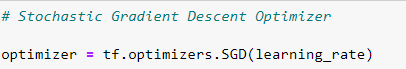

In [25]:
tf.optimizers.SGD?

Init signature:
tf.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    loss_scale_factor=None,
    gradient_accumulation_steps=None,
    name='SGD',
    **kwargs,
)
Docstring:     
Gradient descent (with momentum) optimizer.

Update rule for parameter `w` with gradient `g` when `momentum` is 0:

```python
w = w - learning_rate * g
```

Update rule when `momentum` is larger than 0:

```python
velocity = momentum * velocity - learning_rate * g
w = w + velocity
```

When `nesterov=True`, this rule becomes:

```python
velocity = momentum * velocity - learning_rate * g
w = w + momentum * velocity - learning_rate * g
```

Args:
    learning_rate: A float, a
        `keras.optimizers.schedules.LearningRateSchedule` instance, or
        a callable that takes no arguments and returns the actual value to


In [15]:
# Adding a question mark () after the function name lets you view the latest documentation. 
# This is a handy tool.

In [16]:
# OPTIMISATION PROCESS

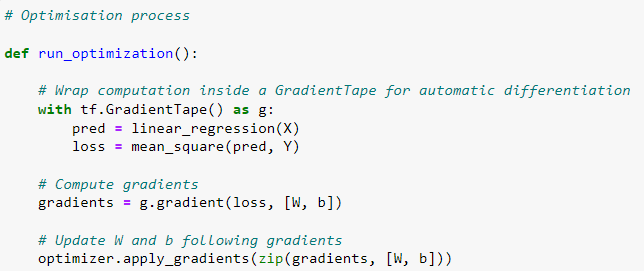

In [34]:
def run_optimization():
    with tf.GradientTape() as g: #wrap computation inside a gradienttape for automatic differentation
        pred = linear_regression(X)
        loss = mean_square(pred,Y)

    gradients = g.gradient(loss,[W,B]) #compute gradients
    optimizer.apply_gradients(zip(gradients,[W,B])) #Update W and B following gradients
        

In [35]:

# Initialize parameters
W = tf.Variable(0.0, dtype=tf.float32)
B = tf.Variable(0.0, dtype=tf.float32)

# Dummy training data
X = tf.constant([1.0, 2.0, 3.0, 4.0], dtype=tf.float32)
Y = tf.constant([2.0, 4.0, 6.0, 8.0], dtype=tf.float32)

# Training loop
training_steps = 100
display_step = 10 


for step in range(1, training_steps + 1):
    run_optimization()  # Run optimization to update W and B
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("Step: %i, Loss: %f, W: %f, B: %f" % (step, loss.numpy(), W.numpy(), B.numpy()))

Step: 10, Loss: 2.375600, W: 0.323376, B: 0.107595
Step: 20, Loss: 1.599734, W: 0.588678, B: 0.195446
Step: 30, Loss: 1.078007, W: 0.806357, B: 0.267108
Step: 40, Loss: 0.727170, W: 0.984985, B: 0.325497
Step: 50, Loss: 0.491242, W: 1.131590, B: 0.373001
Step: 60, Loss: 0.332583, W: 1.251935, B: 0.411583
Step: 70, Loss: 0.225881, W: 1.350746, B: 0.442849
Step: 80, Loss: 0.154117, W: 1.431898, B: 0.468117
Step: 90, Loss: 0.105845, W: 1.498570, B: 0.488467
Step: 100, Loss: 0.073370, W: 1.553367, B: 0.504787


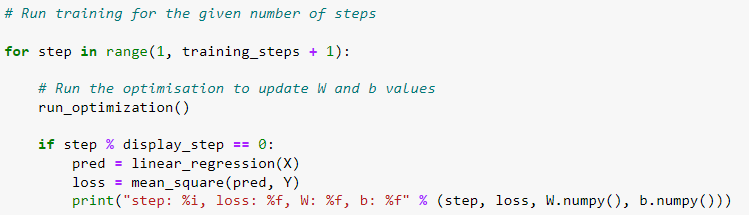

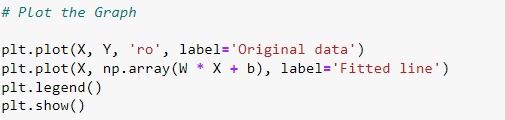

C:\Users\Dhana\AppData\Local\Temp\ipykernel_29636\2891788633.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "ro" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(X, Y, 'ro', label='Original data',marker="p",color="green" )
C:\Users\Dhana\AppData\Local\Temp\ipykernel_29636\2891788633.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, Y, 'ro', label='Original data',marker="p",color="green" )


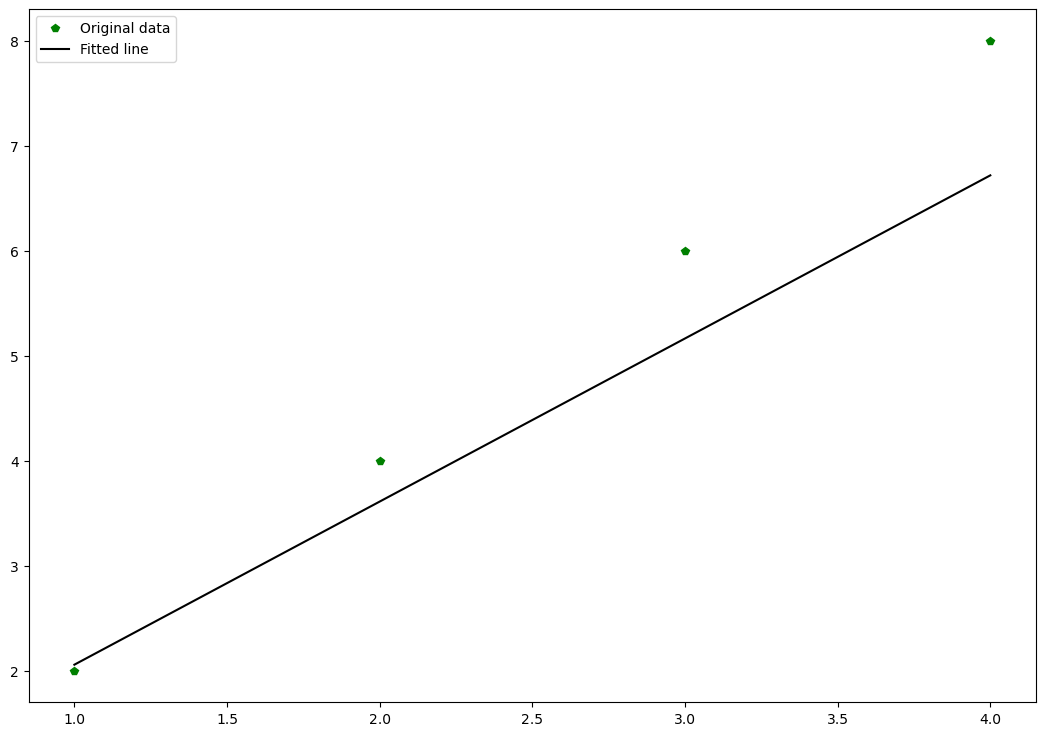

In [37]:
plt.figure(figsize=(13,9))
plt.plot(X, Y, 'ro', label='Original data',marker="p",color="green" )
plt.plot(X, np.array(W * X + B), label='Fitted line',color="black")
plt.legend()
plt.show()

# Lab Logbook requirements: 
### Please make sure to document the following in your Lablogbook:

Include an image of the generated graph depicting the original data and the fitted line for linear regression. Modify the appearance of the graph by adjusting its color or size. Copy the figure and paste it directly into your logbook. Refrain from taking a snapshot; instead, right-click and copy the graph to your lab logbook. Ensure that no code or other information is added to the logbook and that only required graph is present.  

#### Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.